## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?
2. What is a confusion table/matrix? What does it help us understand about a model's performance?
3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?
4. What does the root mean squared error quantify about a particular model?
5. What are overfitting and underfitting?
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?
7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Classification predicts a category (ex. color, type), while regression predicts a numerical output (ex. temperature, price).
2. A confusion table counts predicted versus actual labels. It shows the distribution of how accurate a model was and where mistakes were made. In other words, it shows where the model got confused between different categories.
3. Accuracy is the fraction of correct predictions divided by the total. It may not be sufficient to evaluate performance because the training and test sets may not be truly representative. It also does not take into consideration the costs of errors.
4. RMSE quantifies the magnitude of prediction error. It represents how far off a model's predictions are from reality.
5. Overfitting is when the k value is too small and predictions are too sensitive to outlying neighbors. Underfitting is when the k value is too large and predictions tend towards the global mean, losing structure in the process.
6. Splitting the data into training and testing sets ensures that we can double check our model. If the model was trained and tested on the same data, our model would seem more accurate than it actually is. Choosing k allows us to preserve the structure of data while also limiting the effect outliers have on predictions. RMSE lets us see how accurate our model actually is.
7. Predicting labels can allow us to make decisions quicker and easier, however, we are unable to tell how accurate each output is. Reporting probabilities can allow us to make decisions more confidently since the chances of accuracy can be observed, however, these chances may not be calibrated correctly giving a false sense of security.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [1]:
# setup
! git clone https://github.com/zayliet/scratchpad
%run ./scratchpad/get_data.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

fatal: destination path 'scratchpad' already exists and is not an empty directory.


          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


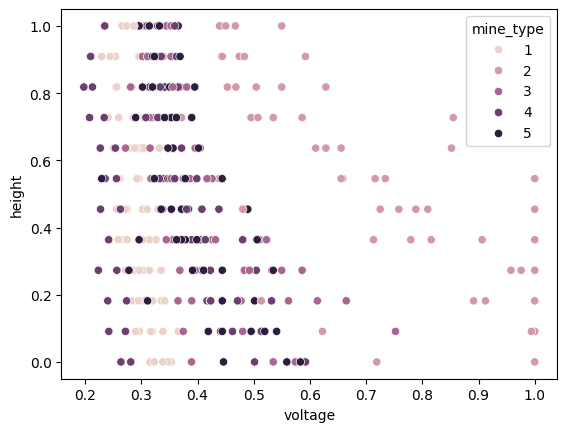

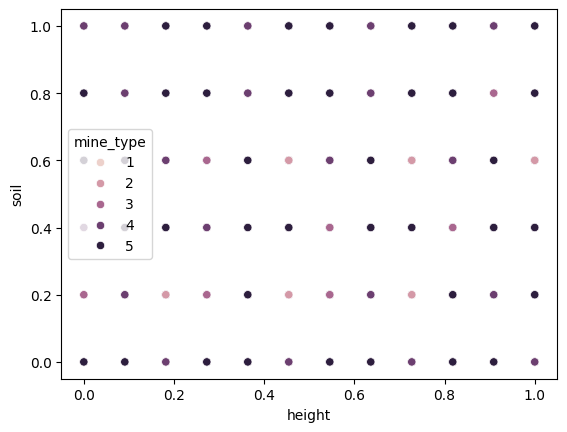

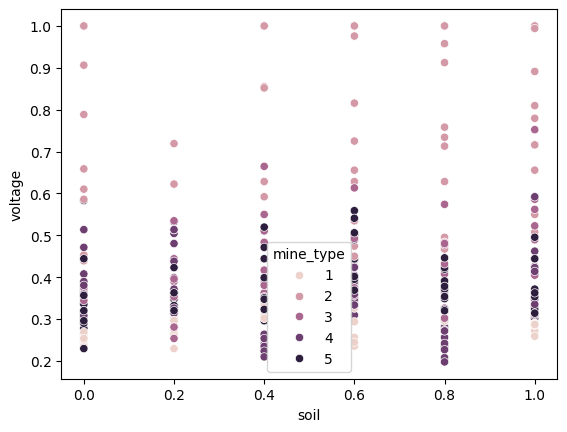

In [2]:
# part 1
df = pd.read_csv('./data/land_mines.csv')
print(df.describe())
sns.scatterplot(x=df['voltage'], y=df['height'], hue=df['mine_type'])
plt.show()
sns.scatterplot(x=df['height'], y=df['soil'], hue=df['mine_type'])
plt.show()
sns.scatterplot(x=df['soil'], y=df['voltage'], hue=df['mine_type'])
plt.show()

In [3]:
# part 2
y = df['mine_type']
ctrl_list = ['voltage', 'height', 'soil']
x = df.loc[:, ctrl_list]
u = MinMaxScaler().fit_transform(x)

u_train, u_test, y_train, y_test = train_test_split(u, y, test_size=0.5, random_state=100)

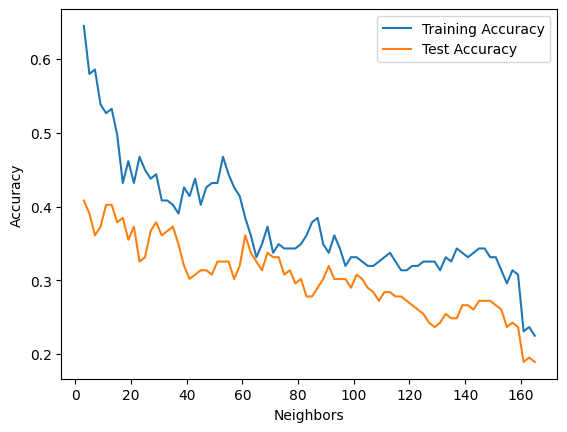

[3]


In [4]:
# part 3
k_grid = np.array([ (2*k+3) for k in range(0,82)]) # Odd number grid
test_accuracies = []
train_accuracies = []
for k in k_grid: # For each candidate value of k...
    model = KNeighborsClassifier(n_neighbors = k) # Create a model instance
    model = model.fit(u_train,y_train) # Fit the model
    y_hat = model.predict(u_test) # Predict values
    test_acc = model.score(u_test,y_test) # Compute test accuracy
    train_acc = model.score(u_train,y_train) # Compute trainin accuracy
    #print( f'Test accuracy for {k} neighbors is {test_acc}; train accuracy for {k} neighbors is {train_acc}')
    test_accuracies.append(test_acc) # Save test results
    train_accuracies.append(train_acc) # Save training results

sns.lineplot(x=k_grid,y=train_accuracies,label='Training Accuracy').set(xlabel='Neighbors',ylabel='Accuracy')
sns.lineplot(x=k_grid,y=test_accuracies,label='Test Accuracy')
plt.show()

is_optimal = test_accuracies == np.max(test_accuracies) # Maximizer Boolean
optimal_indices = np.where(is_optimal) # Indices that maximize accuracy
k_optimal = k_grid[optimal_indices] # Values of k that maximize accuracy
print(k_optimal)

model = KNeighborsClassifier(n_neighbors = k_optimal[0])
model = model.fit(u_train,y_train)
y_hat = model.predict(u_test)

I chose k by testing every odd number (0, 165). I then found the indices and their respective k values with the highest test accuracies, which ended up being k = 3.

In [5]:
# part 4
print(pd.crosstab(y_test, y_hat))

col_0       1   2   3  4   5
mine_type                   
1          28   0   5  3   2
2           0  24   5  2   4
3           8   0  10  3  12
4          17   2  11  4   1
5          12   0  11  2   3


 Part 4: It is roughly accurate. Accuracy decreases as the mine_type decreases as shown through the diagonal.

 Part 5: While the model is more accurate than pure guessing, it should only be used to support decisions, rather than be the basis for all decision-making. If there is a high amount of uncertainty, treat the mine with extra care and back up information with more than just this model.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [6]:
# part 1
cars = pd.read_csv('./data/USA_cars_datasets.csv')
cars = cars[['price', 'year', 'mileage']].copy()
print(cars.isna().sum())
print(cars.head())
print(cars.shape)

price      0
year       0
mileage    0
dtype: int64
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


In [7]:
# part 2
y = cars['price']
ctrl_list = ['year', 'mileage']
x = cars.loc[:, ctrl_list]
u = MinMaxScaler().fit_transform(x)

In [8]:
# part 3
u_train, u_test, y_train, y_test = train_test_split(u, y, test_size=0.2, random_state=100)

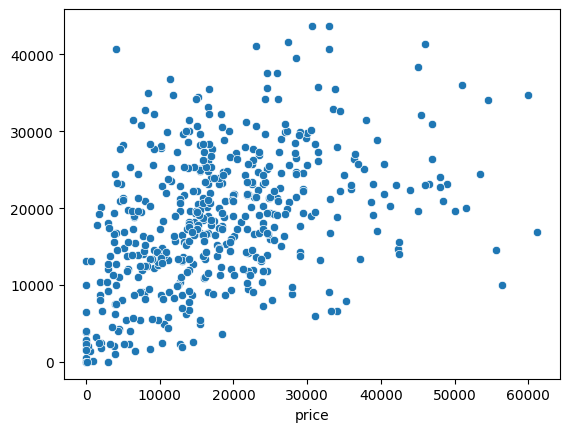

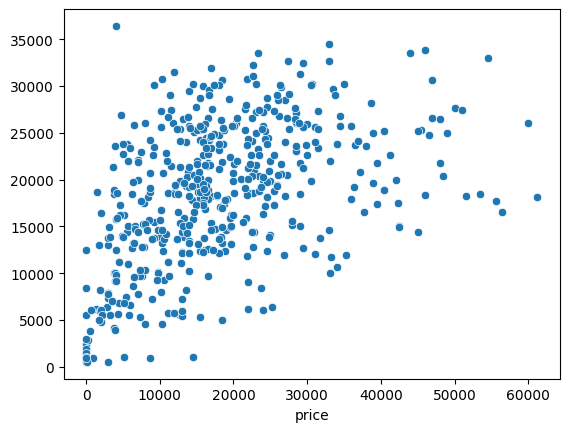

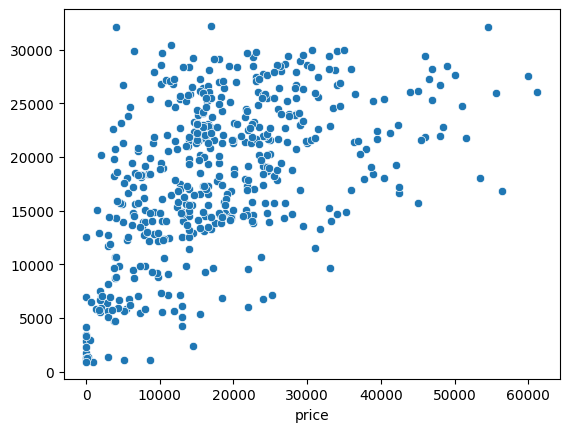

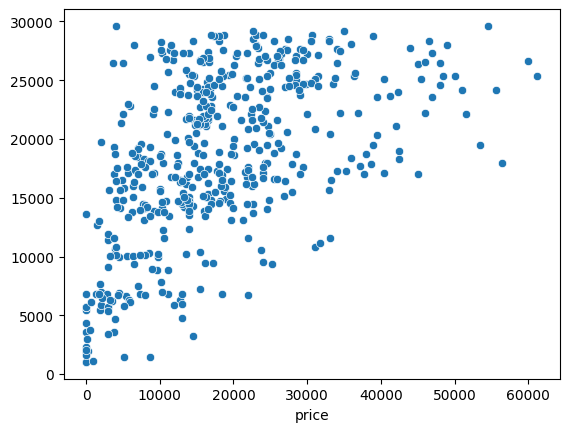

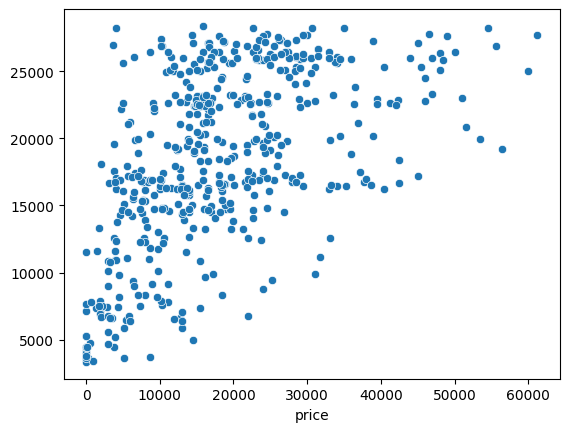

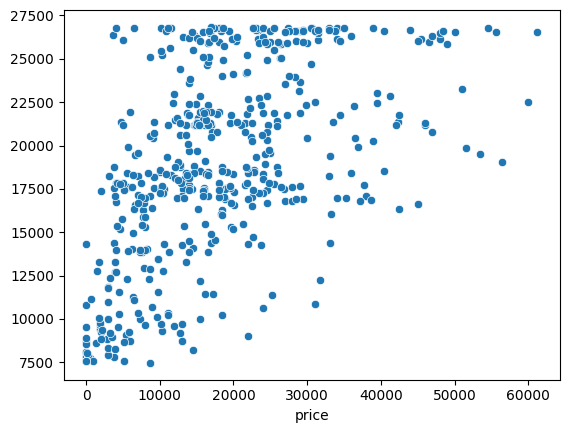

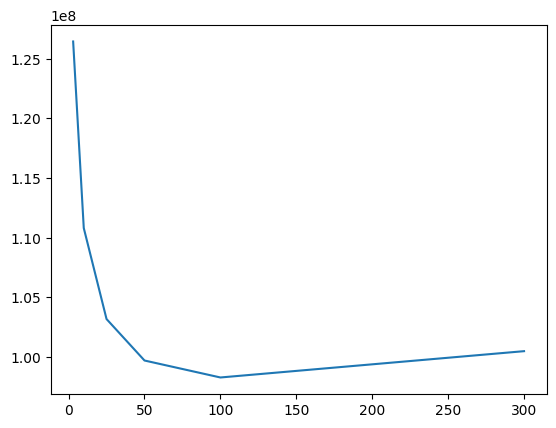

[126446573.21822222, 110802185.58681999, 103170457.848608, 99694130.3796272, 98271058.96092059, 100477298.914212]


In [9]:
# part 4
k_grid = np.array([3,10,25,50,100,300])
mses = [] # List to save MSEs
for k in k_grid:
    model = KNeighborsRegressor(n_neighbors = k) # Create a model instance
    model = model.fit(u_train,y_train) # Fit the model
    y_hat = model.predict(u_test) # Predict values
    mses.append(mean_squared_error(y_test, y_hat)) # Compute and store MSE
    sns.scatterplot(x=y_test, y=y_hat)
    plt.show()
sns.lineplot(x=k_grid, y=mses) # Plot MSE
plt.show()
print(mses)

Part 4: As k increases, the scatterplot tends to be denser in the upper left corner. As for MSE, initially the MSE drops rapidly before slowly inclining as k becomes quite large.

Part 5: The optimal k is 100, since it has the lowest MSE as shown in the lineplot.

Part 6: The scatterplot increases in density in the upper left corner as k increases. The first plot, k=3, is overfitting because the predictions are too close to individual neighbors, resulting in a few outliers affected predictions. The last plot, k=300, is underfitting because the predictions are too close to the global mean and tend inwards when the prices should be more spread out.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [10]:
# part 1
an = pd.read_csv('./data/zoo.csv')
print(an.columns)
print(an['class'].describe())
print(an['class'].value_counts())
print(an.groupby('class').describe())
print(an.groupby('class')['animal'].unique())

Index(['animal', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize', 'class'],
      dtype='object')
count    101.000000
mean       2.831683
std        2.102709
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        7.000000
Name: class, dtype: float64
class
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64
       hair                                             feathers       ...  \
      count     mean       std  min  25%  50%  75%  max    count mean  ...   
class                                                                  ...   
1      41.0  0.95122  0.218085  0.0  1.0  1.0  1.0  1.0     41.0  0.0  ...   
2      20.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0     20.0  1.0  ...   
3       5.0  0.00000  0.000000  0.0  0.0  0.0  0.0  0.0      5.0  0.0  ...   
4      13.0  0.00000  0.0000

I think hair, egg, airborn, aquatic, and fins will best predict which class an animal belongs to.

In [11]:
# part 2
y = an['class']
u = MinMaxScaler().fit_transform(an.drop(columns=['class', 'animal']))
u_train, u_test, y_train, y_test = train_test_split(u, y, test_size=0.5, random_state=100)

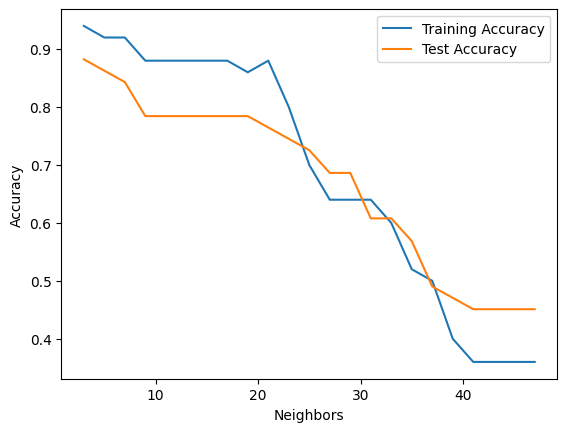

[3]


In [12]:
# part 3
k_grid = np.array([ (2*k+3) for k in range(0,23)]) # Odd number grid
test_accuracies = []
train_accuracies = []
for k in k_grid: # For each candidate value of k...
    model = KNeighborsClassifier(n_neighbors = k) # Create a model instance
    model = model.fit(u_train,y_train) # Fit the model
    y_hat = model.predict(u_test) # Predict values
    test_acc = model.score(u_test,y_test) # Compute test accuracy
    train_acc = model.score(u_train,y_train) # Compute trainin accuracy
    #print( f'Test accuracy for {k} neighbors is {test_acc}; train accuracy for {k} neighbors is {train_acc}')
    test_accuracies.append(test_acc) # Save test results
    train_accuracies.append(train_acc) # Save training results

sns.lineplot(x=k_grid,y=train_accuracies,label='Training Accuracy').set(xlabel='Neighbors',ylabel='Accuracy')
sns.lineplot(x=k_grid,y=test_accuracies,label='Test Accuracy')
plt.show()

is_optimal = test_accuracies == np.max(test_accuracies) # Maximizer Boolean
optimal_indices = np.where(is_optimal) # Indices that maximize accuracy
k_optimal = k_grid[optimal_indices] # Values of k that maximize accuracy
print(k_optimal)

model = KNeighborsClassifier(n_neighbors = k_optimal[0])
model = model.fit(u_train,y_train)
y_hat = model.predict(u_test)

I chose k by testing every odd number (0, 49). I then found the indices and their respective k values with the highest test accuracies, which ended up being k = 3.

In [13]:
# part 4
print(pd.crosstab(y_test, y_hat))

col_0   1   2  3  4  6  7
class                    
1      23   0  0  0  0  0
2       0  12  0  0  0  0
3       1   0  1  1  0  0
4       0   0  0  3  0  0
5       0   0  2  1  0  0
6       0   0  0  0  4  1
7       0   0  0  0  0  2


The classes are generally split into: mammals, airborne, reptiles, fish, amphibians, insects, and aquatic non-fish. The model seems to have difficulty finding the differences between amphibeans and insects or fish. It also confuses fish with reptiles.

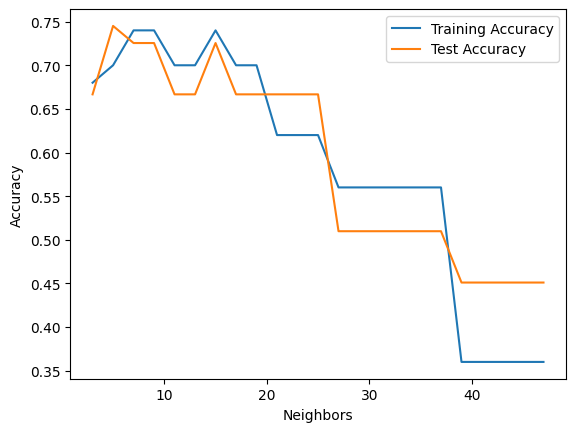

[5]
col_0   1   2  4
class           
1      23   0  0
2       0  12  0
3       0   2  1
4       0   0  3
5       0   0  3
6       0   5  0
7       0   0  2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[0. , 0.6, 0. , 0. , 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0.2],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0.2],
       [0.6, 0.2, 0. , 0. , 0. , 0.2, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0.2],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0.4, 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0. , 0. , 0.4, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.4, 0.2, 0. , 0. , 0. , 0.4],
       [0. , 0.4, 0.2, 0. , 0. , 0. , 0.4],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0. , 0.2],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.4, 0.2, 0. , 0. , 0. , 0.4],
       [0. , 0.6, 0. , 0. , 0. , 0.4, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.6, 0. , 0. , 0. ,

In [14]:
# part 5
y = an['class']
ctrl_list = ['milk', 'aquatic', 'airborne']
u = an.loc[:, ctrl_list]
u_train, u_test, y_train, y_test = train_test_split(u, y, test_size=0.5, random_state=100)

k_grid = np.array([ (2*k+3) for k in range(0,23)]) # Odd number grid
test_accuracies = []
train_accuracies = []
for k in k_grid: # For each candidate value of k...
    model = KNeighborsClassifier(n_neighbors = k) # Create a model instance
    model = model.fit(u_train,y_train) # Fit the model
    y_hat = model.predict(u_test) # Predict values
    test_acc = model.score(u_test,y_test) # Compute test accuracy
    train_acc = model.score(u_train,y_train) # Compute trainin accuracy
    #print( f'Test accuracy for {k} neighbors is {test_acc}; train accuracy for {k} neighbors is {train_acc}')
    test_accuracies.append(test_acc) # Save test results
    train_accuracies.append(train_acc) # Save training results

sns.lineplot(x=k_grid,y=train_accuracies,label='Training Accuracy').set(xlabel='Neighbors',ylabel='Accuracy')
sns.lineplot(x=k_grid,y=test_accuracies,label='Test Accuracy')
plt.show()

is_optimal = test_accuracies == np.max(test_accuracies) # Maximizer Boolean
optimal_indices = np.where(is_optimal) # Indices that maximize accuracy
k_optimal = k_grid[optimal_indices] # Values of k that maximize accuracy
print(k_optimal)

model = KNeighborsClassifier(n_neighbors = k_optimal[0])
model = model.fit(u_train,y_train)
y_hat = model.predict(u_test)
print(pd.crosstab(y_test, y_hat))

model.predict_proba(u_test.values)

Only classes 1, 2, and 4 are represented. The only variables used were milk, aquatic, and airborn, which are direct indicators for classes 1, 2, and 4 respectively. The other classes that are not represented tend to have a combination of these traits along with other traits that are not taken into consideration in this model.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)